# Introduction to Schubert-Piyavskii method
## April, 2024
## A hands-on notebook by Fariman.AA and Kiani.M


This notebook centers on introducing the Schubert-Piyavskii method and demonstrating its application through a basic Python example. We begin by establishing a foundational understanding of the Schubert-Piyavskii method itself.

### Introduction, Whats Schubert-Piyavskii method?
The Schubert-Piyavskii method is an iterative algorithm for global optimization problems defined over a closed interval  $ [a, b] $.  It is designed to locate the global minimum of a function, guaranteed to converge to this minimum regardless of the presence of local minima.

Schubert-Piyavskii algorithm can be summarized in 4 steps:

1. Initialization
2. Sawtooth Lower Bound Construction
3. Iterative Refinement
4. Convergence Criterion

These steps iterate until the algorithm converges to a solution or reaches the maximum number of iterations.


### Advantages of Schubert-Piyavskii
Having established the fundamental principles of the Schubert-Piyavskii method, let us now investigate its key advantages.

* Derivative-Free: Unlike gradient-based methods, it does not need the objective function's derivatives. This is particularly usefull when the derivatives are difficult to compute.

* Handles Non-Smooth Functions: The method is adept at handling non-smooth functions, which pose significant challenges for traditional gradient-based methods.

* No Initial Information Required: gradient-based methods require initial information about the gradient, but this method can be initialized without any knowledge of the gradient direction.

### Lipschitz continuity
The applicability of the Schubert-Piyavskii method hinges on the objective function being Lipschitz continuous. In simpler terms, this implies that the function must be continuous throughout its domain, and its rate of change must be bounded across that domain.

In mathematical terms, a function is considered Lipschitz continuous if it satisfies the following property:

$
\text{Function } f \text{ is Lipschitz continuous on } [a,b] \text{ if there exists an } L \text{ such that:} \\
∀ x,y ∈ [a,b], |f(x)-f(y)| ≤ L|x-y|
$

L denotes the Lipschitz constant, which quantifies the maximum allowable rate of change of a function over a specified interval.

$
\frac{|f(x) - f(y)|}{|x-y|} \le \frac{L|x-y|}{|x-y|} → \frac{df}{dx} \le L
$

$ L $ is greater than or equal to max rate of change of $ f(x) $ in given interval.

A Python function can be devised to ascertain the Lipschitz continuity of a given function over a specified interval with Lipschitz constant $L$. The application of this function necessitates the determination of the Lipschitz constant, a value we will explore methods for calculating later.


In [1]:
import numpy as np
# Function,Domain,Lipschitz constant, Int numbers count in given interval
def findLipschitz(f, domain, initialGuess, znum):
  # Compute the maximum difference between f(x) and f(y) for all pairs of points x, y in the domain
  xValues = np.linspace(domain[0], domain[1], znum)
  max_diff = np.max(np.abs(f(xValues) - f(xValues[:, np.newaxis])))

  # Check if the maximum difference is less than or equal to L times the distance between any two points in the domain
  delta = domain[1] - domain[0]
  while(1==1):
    if max_diff <= initialGuess * delta:
      return initialGuess
    else:
      initialGuess = initialGuess * 2


Furthermore, the Lipschitz constant of a function can be approximated numerically using a straightforward Python implementation, as illustrated below:

### Schubert-Piavskii method
The algorithm can be implemented in Python. It requires the following inputs:
* A function to be minimized (f).
* The domain of the function as a closed interval (a, b).
* The Lipschitz constant of function in given interval.
* A tolerance value (e) that specifies the desired level of accuracy in the solution.
* A maximum number of iterations (N) to prevent the algorithm from running indefinitely.

The Schubert-Piyavskii algorithm is an iterative method designed to locate the minimum value of a function within a specified interval. This algorithm is particularly well-suited for functions exhibiting Lipschitz continuity.

Key Steps:

* Initialization: The algorithm begins by evaluating the function at the midpoint $m$ of the given interval $(a, b)$.
* Sawtooth Lower Bound Construction: Utilizing the Lipschitz constant $ L $, the algorithm constructs a sawtooth-shaped lower bound for the function within the interval. This lower bound is formed by lines with slopes of $±L$ emanating from the points evaluated at the interval endpoints $(a, f(a))$ and $(b, f(b))$ and intersecting with the perpendicular bisector of the line segment connecting the midpoint and either endpoint.
* Iterative Refinement: The algorithm iteratively refines this sawtooth lower bound. In each iteration, it identifies the point on the current lower bound with the minimum function value. It then constructs a new sawtooth lower bound using the identified point and its two neighboring points on the previous lower bound.

* Convergence Criterion: The iterative process continues until a convergence criterion is met. This criterion typically involves a tolerance level $e$. The algorithm terminates when the difference between the function value at the current minimum point on the sawtooth lower bound and the actual function value falls below the specified tolerance.

In essence, the Schubert-Piyavskii algorithm progressively tightens the lower bound on the function value within the interval, leveraging the Lipschitz continuity property to ensure the true minimum cannot lie below this bound. By iteratively refining the lower bound, the algorithm efficiently converges towards the minimum value of the function.





In [2]:
class Pt:
  def __init__(self,x,y):
    self.x = x
    self.y = y

def getIntersection(A,B,l):
  t=((A.y-B.y) - l * (A.x - B.x)) / (2*l)
  return Pt(A.x+t,A.y-t*l)

def shubert_piyavskii(f,a,b,l,e,N):
  n = 0
  m = (a+b)/2
  A = Pt(a,f(a))
  M = Pt(m,f(m))
  B= Pt(b,f(b))
  pts = [A,getIntersection(A,M,l),getIntersection(M,B,l),B]
  D = float('inf')
  while(D>e):
    n+=1
    if n>N:
      break
    i = min(range(len(pts)),key=lambda x: pts[x].y)
    P = Pt(pts[i].x, f(pts[i].x))
    D = P.y - pts[i].y
    P_prev = getIntersection(pts[i-1], P, l)
    P_next = getIntersection(P, pts[i+1], l)
    del(pts[i])
    pts.insert(i, P_next)
    pts.insert(i, P)
    pts.insert(i, P_prev)
  return pts

### Reviewing a simple example
Having established the fundamental principles of the Schubert-Piyavskii algorithm, let's now illustrate its application with an example. Consider a function f(x) that we aim to minimize within the interval $ [-10, 10] $.

$
f(x) = sin(x)
$



In [3]:
def f(x):
  return (np.sin(x))

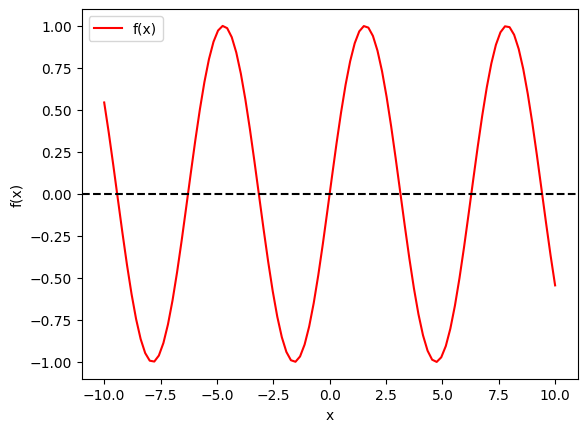

In [4]:
import matplotlib.pyplot as plt
# create a range of values for x
x = np.linspace(-10, 10, 100)

# evaluate the function at each x value
y = f(x)

# plot the function
plt.plot(x, y, label='f(x)',color='red')
# add labels and legend
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
# show the plot
plt.show()

To ensure the applicability of the Schubert-Piyavskii algorithm, we must first verify that the function f(x) is Lipschitz continuous within the specified interval $ [-10, 10] $. Traditionally, Lipschitz continuity is established by finding a Lipschitz constant L, which represents the maximum allowable rate of change of the function across the interval. One common approach to determine the Lipschitz constant involves calculating the derivative of the function $ f'(x) $and finding its maximum absolute value within the interval. However, it's important to acknowledge that this method is not universally applicable. In some cases, the function might not be differentiable everywhere within the interval, or the derivative might not be bounded.

Since the derivative of the function $f(x)$ is known to be simply $cos(x)$, we can proceed to determine the Lipschitz constant within the specified interval $[-10, 10]$. The Lipschitz constant represents the maximum allowable rate of change of the function across the interval.

In [5]:
x = np.linspace(-10,10,100)
y = np.cos(x)
L = np.max(np.abs(y))

print('Lipschitz constant is: '+ str(L))

Lipschitz constant is: 0.9999471661761239


We can also call findLipschitz() function to calculate a valid Lipschitz constant.

In [6]:
interval = (-10,10)
a,b = interval

znum=0
for i in range(a,b+1):
  znum += 1

domain = np.linspace(a, b, znum)

findLipschitz(f,domain,0.1,znum)

1.6

Having established that the function $f(x)$ is Lipschitz continuous within the interval $[-10, 10]$ (with a Lipschitz constant of $L = 0.9999471661761239$), the application of the Schubert-Piyavskii algorithm becomes appropriate.

In [7]:
test = shubert_piyavskii(f,-10,10,L,.0001,1000)
minY = test[0].y
minX = test[0].x
for t in test:
  ## print('X= '+str(t.x)+' Y= '+str(t.y))
  if t.y < minY:
    minY = t.y
    minX = t.x
print('Minimum Data: '+'X:'+str(minX)+' MinY:'+str(np.sin(minX)))

Minimum Data: X:-7.853914933639628 MinY:-0.9999999977755326


Following the analysis, we applied the Schubert-Piyavskii algorithm to the function $f(x) = sin(x)$.


Good luck!